In [1]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
#pd.set_option("display.max_rows", None)

import sys
sys.path.append('/Users/leayamashiro/whispering_gallery_MAIN/WGM_clean/')
import useful_functions as uf
#sys.path.append('/Users/leayamashiro/whispering_gallery_MAIN/WGM_clean/analysis_060225')
import VNA_data_read_local as vdr

In [2]:
copper_Q = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Qfac_eigensweep_0to10_CopperCoating_Al96_CTDim.csv', 
                       skiprows=4)
copper_Q

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,5.000000e+08,4.09811350200765E-15+0.24458074838854507i,4.098114e-15,8.377833e-15
1,5.000000e+08,-2.1249477417817453E-15+0.2568284727708749i,-2.124948e-15,-4.136901e-15
2,5.000000e+08,-4.17400449278557E-15+0.7279313775986606i,-4.174004e-15,-2.867032e-15
3,5.000000e+08,-4.17400449278557E-15+0.7288063804408617i,-4.174004e-15,-2.863589e-15
4,5.000000e+08,4.209769260554526E-9+1.1065661150692555E-6i,4.209769e-09,1.902177e-03
...,...,...,...,...
4684,1.000000e+10,10.112431472693316+0.021107770082401046i,1.011243e+01,2.395429e+02
4685,1.000000e+10,10.115501813324594+0.022672043758627008i,1.011550e+01,2.230831e+02
4686,1.000000e+10,10.116799050290766+0.017441055666030037i,1.011680e+01,2.900283e+02
4687,1.000000e+10,10.11775480565857+0.014896004751518118i,1.011775e+01,3.396130e+02


In [3]:
copper_Q = uf.fix_csv('Qfac_eigensweep_0to10_CopperCoating_Al96_CTDim.csv', 
                      '/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/')

In [4]:
copper_Q

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,5.000000e+08,0.000000+0.244581j,4.098114e-15,8.377833e-15
1,5.000000e+08,-0.000000+0.256828j,-2.124948e-15,-4.136901e-15
2,5.000000e+08,-0.000000+0.727931j,-4.174004e-15,-2.867032e-15
3,5.000000e+08,-0.000000+0.728806j,-4.174004e-15,-2.863589e-15
4,5.000000e+08,0.000000+0.000001j,4.209769e-09,1.902177e-03
...,...,...,...,...
4684,1.000000e+10,10.112431+0.021108j,1.011243e+01,2.395429e+02
4685,1.000000e+10,10.115502+0.022672j,1.011550e+01,2.230831e+02
4686,1.000000e+10,10.116799+0.017441j,1.011680e+01,2.900283e+02
4687,1.000000e+10,10.117755+0.014896j,1.011775e+01,3.396130e+02


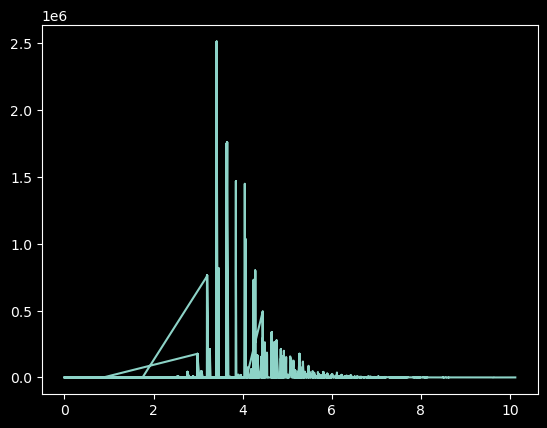

In [5]:
plt.plot(copper_Q['Frequency (GHz)'], copper_Q['Quality factor (1)'])

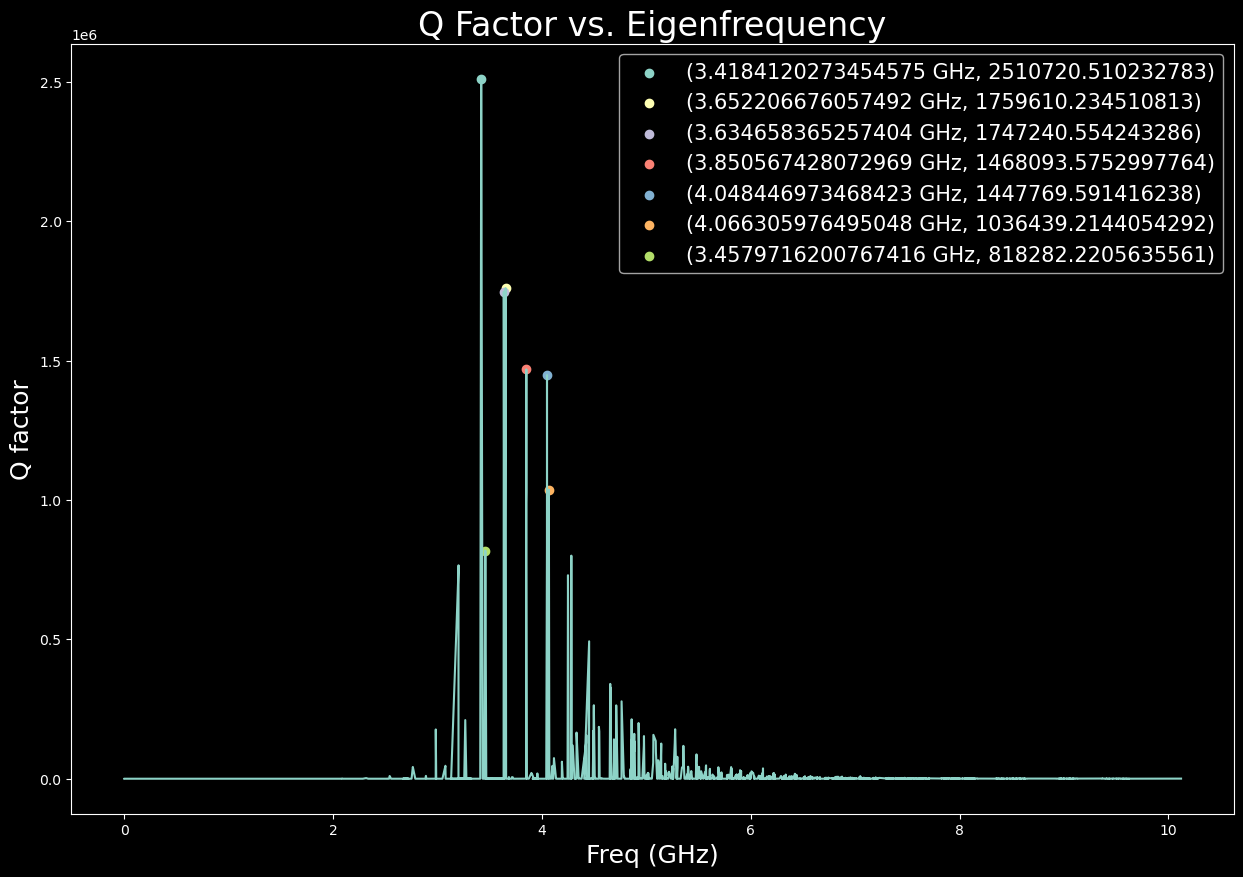

In [14]:
all_Q, Q_peaks = uf.find_plot_Q_peaks(copper_Q, n_peaks=7)

Notes on these peaks: 
- 3.201 = TE
- 3.26 = TM
- 3.418 = TE
- 3.458 = TM
- 3.63 = TE
- 3.652 = TM 
- 3.85056 = TE 
- 4.0484 = TM 
- 4.0663 = TE

in between notes: 
eigens @ 3.8486, 3.85, 3.8506, 3.8508
- 3.8486 = TM
- 3.85 = TM
- 3.8506 = TE
- 3.8508 = TE
(although they are kind of hybrid modes)





In [ ]:
# notes on these peaks: 


In [8]:
Q_peaks.sort_values('freqs')

,index,cf,freqs,Q
8,847,2.000000e+09,3.201355,7.654363e+05
18,1080,2.500000e+09,3.265714,2.103287e+05
0,1286,3.000000e+09,3.418412,2.510721e+06
6,1293,3.000000e+09,3.457972,8.182822e+05
2,1325,3.000000e+09,3.634658,1.747241e+06
1,1472,3.500000e+09,3.652207,1.759610e+06
3,1536,3.500000e+09,3.850567,1.468094e+06
4,1689,4.000000e+09,4.048447,1.447770e+06
5,1697,4.000000e+09,4.066306,1.036439e+06
9,1758,4.000000e+09,4.249257,7.298171e+05
